# InstaBot - Part 2

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium.common.exceptions import NoSuchElementException

# Disable Chrome Browser Notification
option = Options()
option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})
driver = webdriver.Chrome(options=option)

In [2]:
#Oprning web driver and LogIn. All the functionality is same as before.
driver = webdriver.Chrome()
driver
driver.get('https://www.instagram.com/')
driver.implicitly_wait(5)

#locating input_box
input_box = driver.find_elements(By.TAG_NAME, 'input')

#sending unsername input
inp_userid = input_box[0]
inp_userid.send_keys('SAMPLE')

#sending password input
inp_pswd = input_box[1]
inp_pswd.send_keys('SAMPLE')

#clicking on logIn button
login_btn = driver.find_elements(By.TAG_NAME, 'button')
login_btn[1].submit()

#popup control
driver.find_element(By.CLASS_NAME, '_ac8f').click()
driver.find_element(By.CLASS_NAME, '_a9_1').click()
driver.maximize_window()

In [3]:
#function for searching profiles
def SearchPage(page_name):
    driver.get('https://www.instagram.com/')
    search_tab = driver.find_element(By.LINK_TEXT, 'Search')
    search_tab.click() 
    search_bar = driver.find_element(By.TAG_NAME, 'input')
    time.sleep(2)
    search_bar.clear()
    search_bar.send_keys(page_name)

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.

###### Answer: Obtained the list of 10 instagram handles when searched ‘food’ same as in previous project. Then visited each handle and found followers and identified the top5 users on tha basis of number of followers. Write function to get number of posts in past 3 days. Used these results to plot graph.

#### 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers


In [4]:
#function for searching profiles
SearchPage('food')
user_ids = driver.find_elements(By.XPATH, "//div[@class='x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")
#10 user ids related to food
users = []
i = 1
for user_id in user_ids: 
    html_data = user_id.get_attribute('outerHTML')
    id_content = BeautifulSoup(html_data, 'html.parser')
    name = id_content.a['href'].split('/')[1]
    if name != 'explore' and name != 'food':
        users.append(name)
        print(name)
        i += 1
    if i > 10:
        break
        

foodieclicks26
satna_foodblogger
foodtalkindia
nepal.food
yourfoodlab
indorefoodexplorer
food.darzee
foodpharmer
bhopalfoodwalks
dilsefoodie


In [6]:
#function for getting top 5 handle which have highest number of followers
followers_l = []
for i in users:
    #for search a user
    SearchPage(i)
    driver.find_element(By.XPATH, "//div[@class='x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a").click()
    time.sleep(5)
    #locating followers of user
    followers_btn = driver.find_element(By.PARTIAL_LINK_TEXT, "followers")
    followers = BeautifulSoup(followers_btn.get_attribute('innerHTML'),'html.parser').span['title']
    #replacing ',' with '' and converted into int
    followers = int(followers.replace(',', ''))
    followers_l.append(followers) 
    
followers_l=np.array(followers_l, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers_l)][::-1]
followers_l=followers_l[np.argsort(followers_l)][::-1]

#now printing top 5 and storing the data
#dct. top_handles contains username with number of followers
top5=[]
top_handles={}
for x in range(5):
    print(users[x])
    top5.append(users[x])
    top_handles[users[x]] = followers_l[x]

yourfoodlab
dilsefoodie
foodpharmer
nepal.food
foodtalkindia


#### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [12]:
#this function returns number of post posted by user in 3 days
def getpost_3days(user):
    #opening user page
    SearchPage(user)
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, "//div[@class='x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a"))).click()
    time.sleep(5)
    
    #locating first post
    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class= '_ac7v  _al3n']/div/a")))
    post.click()
    #counting the posts and avoiding pined posts if any
    count = 0
    pin = 1
    while True:
        #getting the time of post
        time_tag = driver.find_element(By.XPATH,"//div[@class='_aacl _aaco _aacu _aacx _aad6 _aade _aaqb']//time")
        #ifentifing posts of relevent time
        if 'AGO' in time_tag.text:
            time_string = time_tag.text.split()
            if time_string[1] in ['HOURS', 'HOUR', 'SECONDS']:
                count+=1
            elif time_string[1]in ['DAY', 'DAYS'] and int(time_string[0])<=3:
                count+=1
            else:
                driver.back()
                break
            if count > 3:
                pin = 5
        else:
            pin += 1
            if pin > 4:
                driver.back()
                break 
            
        time.sleep(2)
        #locating next button
        btn = driver.find_elements(By.XPATH,"//button[@class='_abl-']")
        for i in btn:
            next_btn = BeautifulSoup(i.get_attribute('innerHTML'),'html.parser').find('svg')
            if next_btn['aria-label'] == 'Next':
                i.click()
                break
    return count

In [21]:
#printing no of post by user in past 3 days
No_of_posts =[]
for user in top5:
    count = getpost_3days(user)
    No_of_posts.append(count)
    print(user, "have done", count, "posts in past 3 days")
   

yourfoodlab have done 3 posts in past 3 days
dilsefoodie have done 5 posts in past 3 days
foodpharmer have done 1 posts in past 3 days
nepal.food have done 6 posts in past 3 days
foodtalkindia have done 4 posts in past 3 days


#### 3.Depict this information using a suitable graph.

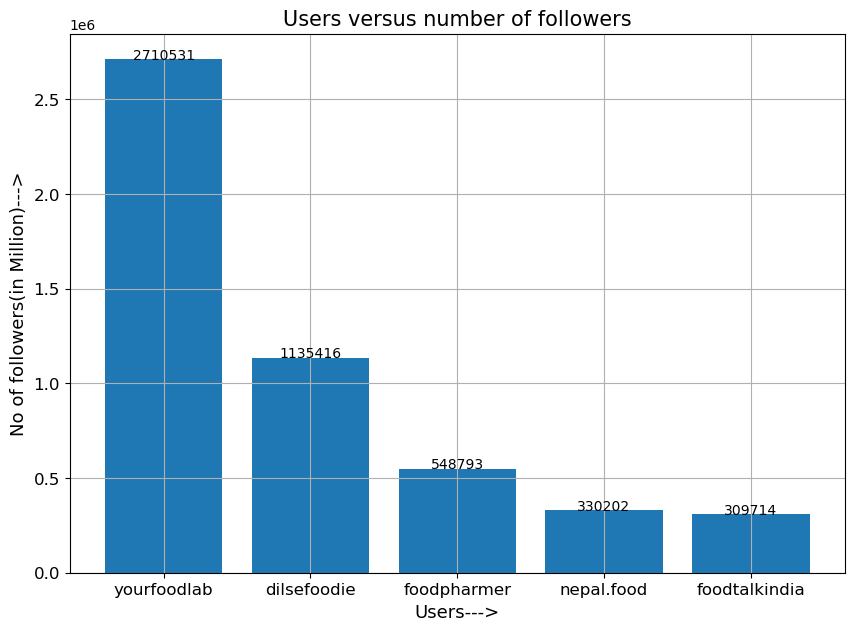

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
# ploted graph for username and number of post
plt.figure(figsize=(10, 7))
plt.bar(top5, followers_l[:5])
plt.xticks(size=12)
plt.yticks(size=12)
addlabels(top5, followers_l[:5])
plt.title('Users versus number of followers', size=15)
plt.xlabel('Users--->', size=13)
plt.ylabel('No of followers(in Million)--->', size=13)
plt.grid()
plt.show()

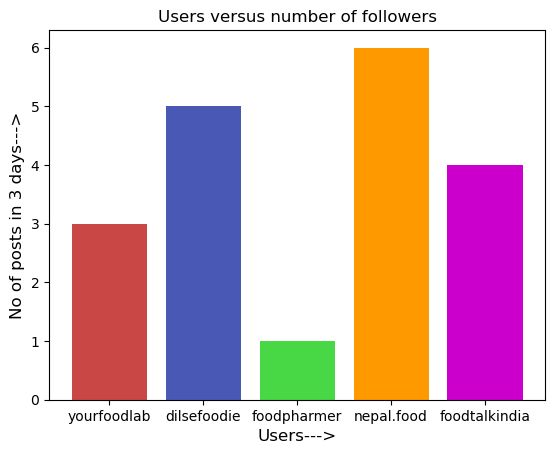

In [30]:
# ploted graph for No_of_post and top5 username
plt.bar(top5, No_of_posts, color=['#C94845', '#4958B5', '#49D845', '#FF9900', '#CC00CC'])
#plt.xticks(size=12)
#plt.yticks(size=12)
plt.title('Users versus number of followers', size=12)
plt.xlabel('Users--->', size=12)
plt.ylabel('No of posts in 3 days--->', size=12)
plt.show()

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  
###### Answer:  Scraped the content of first 10 posts by visiting each handle and stored the all hashtags used in content of posts. All this is done by  'extract_content' function that needs list of user handles(we optained in previous qustion) as argument. Then, using dictionary, calculated the frequency of each word  and stored this data in a csv file. Identified the most popular hashtags and ploted a pie chart for it.

##### 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [5]:
#information from 1.1
top5 = ['yourfoodlab', 'dilsefoodie', 'foodpharmer', 'nepal.food', 'foodtalkindia']

In [8]:
#function for extracting content(hashtags) of first 10 posts of each user fronm list(top5) of user handles.
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            SearchPage(user)
            driver.find_element(By.XPATH, "//div[@class='x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a").click()
            time.sleep(5)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 4000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements(By.CLASS_NAME, '_ac7v')
            p =0
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH, '//h1[@class = "_aacl _aaco _aacu _aacx _aad7 _aade"]/a')
                for hashtag in hashtags:
                    #appending in list
                    text_hastag = hashtag.text
                    if text_hastag[0] == '#':
                        hashtags_list.append(text_hastag)  
                
                #locating close button and clicking on it
                driver.back()
                time.sleep(1)
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [9]:
hashtags = extract_content(top5)

In [10]:
print(hashtags)

['#YFLhome', '#ChefItUp', '#Season2', '#CookingChallenge', '#yourfoodlab', '#sanjyotkeer', '#thalipeeth', '#foodporn', '#yourfoodlab', '#sanjyotkeer', '#dalpanchmel', '#foodporn', '#yourfoodlab', '#foodporn', '#sanjyotkeer', '#goanfishcurry', '#dilsefoodie', '#dilsecouple', '#food', '#foodfood', '#breakfast', '#streetfood', '#dilsefoodie', '#cholebhature', '#food', '#foodfood', '#streetfood', '#dilsefoodie', '#food', '#streetfood', '#combos', '#chicken', '#veg', '#dilsefoodie', '#buffet', '#food', '#rajasthan', '#laalmaas', '#dilsefoodie', '#dilsecouple', '#breadpakoda', '#monsoon', '#rain', '#dilsefoodie', '#galoutikebabs', '#lucknow', '#food', '#streetfood', '#dilsefoodie', '#naan', '#streetfood', '#bodybuilding', '#foodfood', '#dilsefoodie', '#dilsecouple', '#food', '#foodfood', '#nonvegfood', '#mutton', '#streetfood', '#dilsefoodie', '#egg', '#bread', '#streetfood', '#butter', '#dilsefoodie', '#dilsecouple', '#food', '#rajasthan', '#novotelhotel', '#WhyLays', '#FoodPharmer', '#Food

##### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [11]:
#dct contains username with number of followers
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#food 14
#dilsefoodie 10
#streetfood 7
#foodtalkindia 6
#delicious 6
#yummy 6
#discover 6
#dilsecouple 4
#foodfood 4
#flavours 4
#yourfoodlab 3
#sanjyotkeer 3
#foodporn 3
#FoodPharmer 3
#rajasthan 2
#monsoon 2
#delhincr 2
#delhi 2
#YFLhome 1
#ChefItUp 1
#Season2 1
#CookingChallenge 1
#thalipeeth 1
#dalpanchmel 1
#goanfishcurry 1
#breakfast 1
#cholebhature 1
#combos 1
#chicken 1
#veg 1
#buffet 1
#laalmaas 1
#breadpakoda 1
#rain 1
#galoutikebabs 1
#lucknow 1
#naan 1
#bodybuilding 1
#nonvegfood 1
#mutton 1
#egg 1
#bread 1
#butter 1
#novotelhotel 1
#WhyLays 1
#dubai 1
#uae 1
#guide 1
#bookmark 1
#friendshipday 1
#koreanbbq 1
#arcade 1
#bowling 1
#games 1
#bar 1
#cocktails 1
#drinks 1
#butterchicken 1
#deliciousdiscoveries 1
#facts 1
#yogurt 1
#froyo 1
#sweet 1
#NewInTown 1
#retro 1
#doitatrewind 1
#unitedcoffeehouse 1
#uchrewind 1
#restro 1
#FTIFinds 1
#TheLassoWay 1
#shortbreadbiscuits 1
#chubbybaker 1
#tedlasso 1
#biscuits 1
#mumbai 1


##### 3.Create a csv file with two columns : the word and its frequency

In [12]:
#creating dataframe using pandas
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#food,14
1,#dilsefoodie,10
2,#streetfood,7
3,#foodtalkindia,6
4,#delicious,6
5,#yummy,6
6,#discover,6
7,#dilsecouple,4
8,#foodfood,4
9,#flavours,4


##### 4.Now, find the hashtags that were most popular among these bloggers

In [15]:
#printing the most popular(frequently used) from the above data
print(words_list[0][0])

#food


##### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

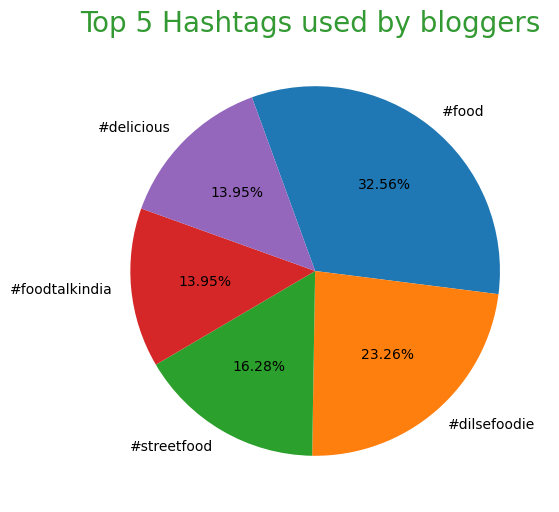

In [13]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

###### Answer:  Made the function 'get_likes'  to get the number of likes of first 10 posts  of given user name. Using this funtion extracted likes of top5 user handles and stored that in  a dictionary. Used that dictionary to find the average like of each user handle, then divide the avg likes obtained from number of followers(obtained in qus. 1.1) of that handle to get the desired ratio for each handle. Finally ploted the results on graph.

#### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [4]:
#information from 1.1
top5 = ['yourfoodlab', 'dilsefoodie', 'foodpharmer', 'nepal.food', 'foodtalkindia']

In [23]:
#function for extracting the no. of likes in first 10 posts of an user handle
def get_likes(user):
        likes = []
        #This fuction will search a user and open that profile
        SearchPage(user)
        driver.find_element(By.XPATH, "//div[@class='x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a").click()
        time.sleep(5)
        #just for scrolling
        driver.execute_script('window.scrollTo(0, 3000);')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, -3000);')
        time.sleep(2)
        #locating the post of the user
        i = 0
        posts = driver.find_elements(By.XPATH, '//div[@class="_ac7v  _al3n"]//a')
        posts[0].click()
        while i < 10:
            time.sleep(2)
            #locating like and clicking on it
            like = driver.find_elements(By.XPATH, '//section[@class ="_ae5m _ae5n _ae5o"]//a')[-1]
            time.sleep(2)
            like = like.text
            no_of_likes = (like.split()[0]).replace(',' , '')
            likes.append(int(no_of_likes))
            time.sleep(1)
            #locating next button and clicking on it
            next_post = driver.find_elements(By.XPATH,"//button[@class='_abl-']")
            for btn in next_post:
                next_btn = BeautifulSoup(btn.get_attribute('innerHTML'),'html.parser').find('svg')
                typ = next_btn['aria-label']
                if typ =='Next':
                    btn.click()
                    i += 1
                    break
            


        return likes

In [24]:
#dct will store username with list of likes
dct = {}
for user in top5 : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of yourfoodlab :
2877 Likes
11272 Likes
33226 Likes
9349 Likes
10098 Likes
45921 Likes
29175 Likes
3111 Likes
32180 Likes
2699 Likes

Number of likes of the top 10 posts of dilsefoodie :
3673 Likes
14271 Likes
9266 Likes
5237 Likes
8120 Likes
63102 Likes
11221 Likes
29464 Likes
5237 Likes
5722 Likes

Number of likes of the top 10 posts of foodpharmer :
277994 Likes
208913 Likes
395202 Likes
64237 Likes
17783 Likes
23680 Likes
36604 Likes
273100 Likes
14596 Likes
30127 Likes

Number of likes of the top 10 posts of nepal.food :
423 Likes
2457 Likes
4877 Likes
2308 Likes
4232 Likes
5991 Likes
1002 Likes
3934 Likes
2007 Likes
2134 Likes

Number of likes of the top 10 posts of foodtalkindia :
90 Likes
68 Likes
112 Likes
159 Likes
291 Likes
100 Likes
145 Likes
158 Likes
261 Likes
210 Likes



In [44]:
#information collocted in 1.1
top_handles = {'yourfoodlab':2710521,'dilsefoodie':1135416 , 'foodpharmer':548793, 'nepal.food':330202, 'foodtalkindia':309714}

##### 2.Calculate the average likes for a handle.

In [25]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [26]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
yourfoodlab : 17990
dilsefoodie : 15531
foodpharmer : 134223
nepal.food : 2936
foodtalkindia : 159


##### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [27]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [32]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes,top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
yourfoodlab : 150
dilsefoodie : 73
foodpharmer : 4
nepal.food : 112
foodtalkindia : 1947


##### 4.Create a bar graph to depict the above obtained information.

In [37]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

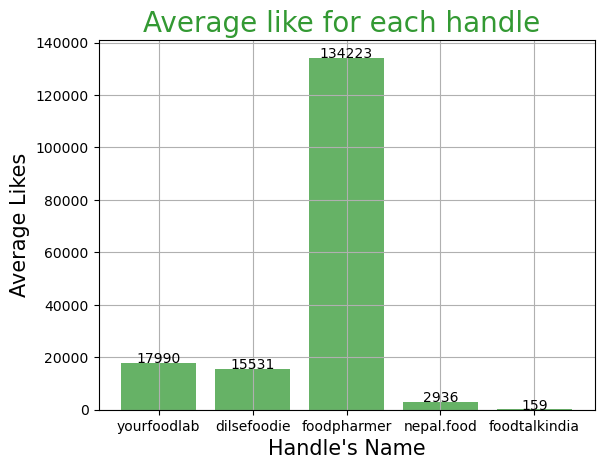

In [40]:
#Plotting Bar Graph for average likes of each handle
#for this I will use answer of problem 3.2

username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
addlabels(username,avg_like)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

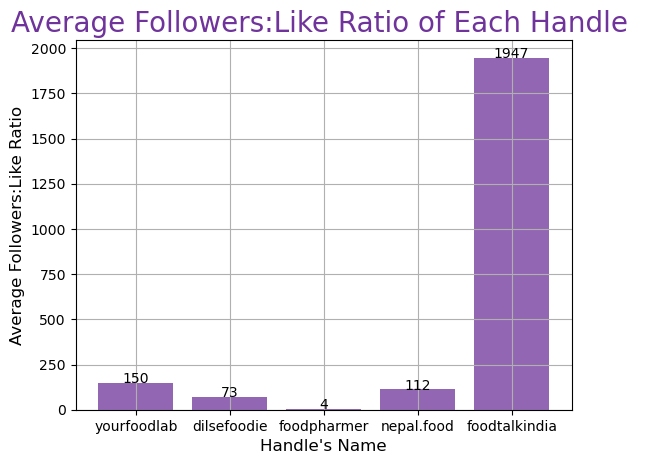

In [41]:
# Plotting Bar Graph for average followers:like ratio of each handle
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
addlabels(username,avg_like)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()

In [ ]:
driver.close()